In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

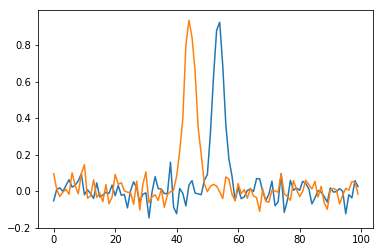

In [2]:
# make fake data
n_neurons = 100
NNN = np.random.uniform(-2, 2, n_neurons)[:,None]
def trial(shift=0, noise=.05):
    nt = 100
    t = np.linspace(-20, 20, nt)
    x = np.exp(-(t-shift-NNN)**2)
    return x + noise*np.random.randn(n_neurons, nt)

# dataset
ntrials = 1000
data = np.array([trial(np.random.uniform(-6, 6)).T for _ in range(ntrials)])

# plot first trial
plt.plot(data[0,:,:2])

In [3]:
data.shape

(1000, 100, 100)

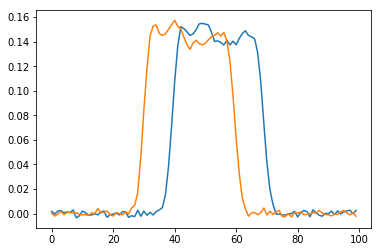

In [4]:
from affinewarp import AffineWarping
model = AffineWarping(data, max_scale=1)
plt.plot(data[:,:,:2].mean(0))

100%|██████████| 20/20 [00:03<00:00,  6.74it/s]


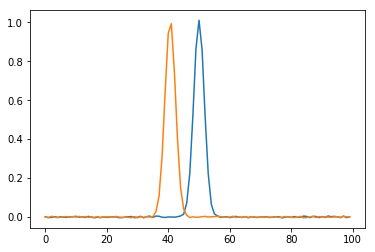

In [5]:
for _ in range(5):
    model.fit_warps(iterations=20)
    model.fit_template()
plt.plot(model.template[:,:2])

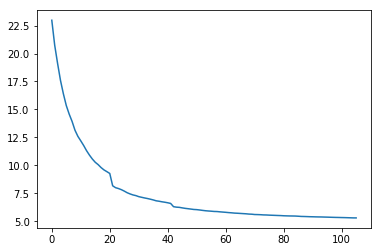

In [6]:
plt.plot(model.loss_hist)

In [7]:
aligned_data = model.transform()

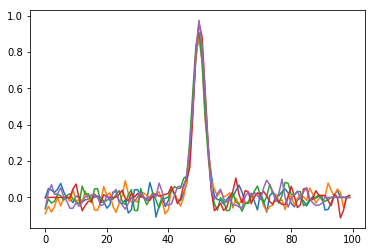

In [8]:
plt.plot(aligned_data[:5,:,0].T)

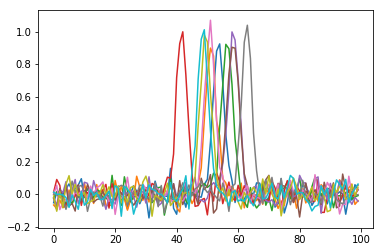

In [9]:
plt.plot(data[:10,:,0].T)